# `clust-learn` - Module 1: Data Preprocessing

Results from ML models are only as good as the data they are trained on. This is the reason why data preprocessing is essential to obtain robust and reliable results. 

机器学习模型的结果仅与它们所训练的数据一样好。这就是为什么数据预处理对于获得稳健和可靠的结果至关重要.

This guide shows you how to use the `data_preprocessing` module of the `clust-learn` package to perform missing data assessment and imputation, and outlier detection. The imputation is performed running every step of the methodology at a time.

本指南向您展示了如何使用clust-learn包中的data_preprocessing模块来执行缺失数据评估和填充，以及异常值检测。填充（插补）是通过一次执行方法论的每一步来完成的.

## 0. Setup

In [62]:
import numpy as np
import pandas as pd

from clearn.data_preprocessing import *

pd.set_option('display.max_columns', None)

## 1. Data loading

In [63]:
df = pd.read_csv('data2/ATG_modified.csv')

df.head()

,IDCNTRY,IDPOP,IDGRADER,IDGRADE,IDSCHOOL,IDTEACH,IDLINK,IDTEALIN,ITLANG_TQ,LCID_TQ,ISDUMMY,ATBG01,ATBG02,ATBG03,ATBG04,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBG10A,ATBG10B,ATBG10C,ATBG10D,ATBG10E,ATBG10F,ATBG10G,ATBG10H,ATBG10I,ATBG10J,ATBG10K,ATBG10L,ATBG11A,ATBG11B,ATBG11C,ATBG11D,ATBG11E,ATBG11F,ATBG11G,ATBG11H,ATBG11I,ATBG12A,ATBG12B,ATBG12C,ATBG12D,ATBG12E,ATBG12F,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBR03A,ATBR03B,ATBR03C,ATBR03D,ATBR03E,ATBR03F,ATBR03G,ATBR03H,ATBR04,ATBR05,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATBGEAS,ATDGEAS,ATBGSOS,ATDGSOS,ATBGTJS,ATDGTJS,ATBGSLI,ATDGSLI,ATDGLIHY,ATDGRIHY,VERSION,SCOPE,LINK_index
0,446,1,2,4,5001,500101,1,50010101,10.0,5124.0,0,32.0,1.0,5.0,4.0,1.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,34.0,34.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,280.0,90.0,2.0,4.0,4.0,3.0,2.0,1.0,3.0,4.0,2.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,5.0,9.44107,2.0,13.68150,1.0,8.67953,2.0,10.27928,2.0,182.0,58.50000,7,1,44650015001011500101014
1,446,1,2,4,5001,500102,2,50010202,10.0,5124.0,0,7.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,4.0,3.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,34.0,34.0,7.0,8.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,240.0,120.0,2.0,4.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,4.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,5.0,5.59410,3.0,7.18418,2.0,9.82876,2.0,9.10220,2.0,156.0,78.00000,7,1,44650015001022500102024
2,446,1,2,4,5001,500103,3,50010303,10.0,5124.0,0,26.0,1.0,5.0,4.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,25.0,25.0,1.0,8.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,280.0,60.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,9.44107,2.0,11.59162,1.0,8.01840,2.0,10.90415,1.0,182.0,39.00000,7,1,44650015001033500103034
3,446,1,2,4,5002,500201,1,50020101,1.0,10333.0,0,7.0,1.0,2.0,5.0,1.0,2.0,1.0,2.0,3

In [64]:
df.shape

(414, 186)

We separate numerical and categorical variables.

我们分离数值变量和分类变量.

In [65]:
num_vars = ["ATBG01","ATBR01A","ATBR01B","ATBR02A","ATBR02B","ATBR04",
            "ATBR05","ATBGEAS","ATBGSOS","ATBGTJS","ATBGSLI","ATDGLIHY","ATDGRIHY"]
cat_vars = ["ITLANG_TQ","LCID_TQ","ATBG02","ATBG03","ATBG04",
            "ATBG05AA","ATBG05AB","ATBG05AC","ATBG05AD","ATBG05BA","ATBG05BB",
            "ATBG05BC","ATBG05BD","ATBG05BE","ATBG05BF","ATBG05BG","ATBG05BH",
            "ATBG05BI","ATBG05BJ","ATBG05BK","ATBG06","ATBG07AA","ATBG07BA",
            "ATBG07AB","ATBG07BB","ATBG07AC","ATBG07BC","ATBG07AD","ATBG07BD",
            "ATBG07AE","ATBG07BE","ATBG07AF","ATBG07BF","ATBG07AG","ATBG07BG",
            "ATBG08A","ATBG08B","ATBG08C","ATBG08D","ATBG08E","ATBG09A","ATBG09B",
            "ATBG09C","ATBG09D","ATBG10A","ATBG10B","ATBG10C","ATBG10D","ATBG10E",
            "ATBG10F","ATBG10G","ATBG10H","ATBG10I","ATBG10J","ATBG10K","ATBG10L",
            "ATBG11A","ATBG11B","ATBG11C","ATBG11D","ATBG11E","ATBG11F","ATBG11G",
            "ATBG11H","ATBG11I","ATBG12A","ATBG12B","ATBG12C","ATBG12D","ATBG12E",
            "ATBG12F","ATBR03A","ATBR03B","ATBR03C","ATBR03D","ATBR03E","ATBR03F",
            "ATBR03G","ATBR03H","ATBR06A","ATBR06B","ATBR06C","ATBR06D","ATBR06E",
            "ATBR07AA","ATBR07AB","ATBR07AC","ATBR07AD","ATBR07BA","ATBR07BB",
            "ATBR07BC","ATBR07BD","ATBR08A","ATBR08B","ATBR08C","ATBR08D","ATBR08E",
            "ATBR08F","ATBR08G","ATBR08H","ATBR09A","ATBR09B","ATBR09C","ATBR09D",
            "ATBR09E","ATBR09F","ATBR09G","ATBR09H","ATBR09I","ATBR10A","ATBR10B",
            "ATBR10C","ATBR10D","ATBR10E","ATBR10F","ATBR10G","ATBR10H","ATBR10I",
            "ATBR10J","ATBR10K","ATBR10L","ATBR11A","ATBR11B","ATBR11C","ATBR11D",
            "ATBR11E","ATBR12A","ATBR12BA","ATBR12BB","ATBR12BC","ATBR12BD","ATBR12C",
            "ATBR12DA","ATBR12DB","ATBR12DC","ATBR12EA","ATBR12EB","ATBR12EC",
            "ATBR12ED","ATBR12EE","ATBR13A","ATBR13B","ATBR13C","ATBR13D","ATBR13E",
            "ATBR14","ATBR15","ATBR16","ATBR17A","ATBR17B","ATBR17C","ATBR18A","ATBR18B",
            "ATBR18C","ATBR18D","ATBR18E","ATBR19","ATDGEAS","ATDGSOS","ATDGTJS","ATDGSLI"]

In [66]:
columns_to_extract = ["LINK_index","ITLANG_TQ","LCID_TQ","ATBG01","ATBG02","ATBG03","ATBG04",
                    "ATBG05AA","ATBG05AB","ATBG05AC","ATBG05AD","ATBG05BA","ATBG05BB","ATBG05BC","ATBG05BD",
                    "ATBG05BE","ATBG05BF","ATBG05BG","ATBG05BH","ATBG05BI","ATBG05BJ","ATBG05BK","ATBG06",
                    "ATBG07AA","ATBG07BA","ATBG07AB","ATBG07BB","ATBG07AC","ATBG07BC","ATBG07AD","ATBG07BD",
                    "ATBG07AE","ATBG07BE","ATBG07AF","ATBG07BF","ATBG07AG","ATBG07BG","ATBG08A","ATBG08B",
                    "ATBG08C","ATBG08D","ATBG08E","ATBG09A","ATBG09B","ATBG09C","ATBG09D","ATBG10A","ATBG10B",
                    "ATBG10C","ATBG10D","ATBG10E","ATBG10F","ATBG10G","ATBG10H","ATBG10I","ATBG10J","ATBG10K",
                    "ATBG10L","ATBG11A","ATBG11B","ATBG11C","ATBG11D","ATBG11E","ATBG11F","ATBG11G","ATBG11H",
                    "ATBG11I","ATBG12A","ATBG12B","ATBG12C","ATBG12D","ATBG12E","ATBG12F","ATBR01A","ATBR01B",
                    "ATBR02A","ATBR02B","ATBR03A","ATBR03B","ATBR03C","ATBR03D","ATBR03E","ATBR03F","ATBR03G",
                    "ATBR03H","ATBR04","ATBR05","ATBR06A","ATBR06B","ATBR06C","ATBR06D","ATBR06E","ATBR07AA",
                    "ATBR07AB","ATBR07AC","ATBR07AD","ATBR07BA","ATBR07BB","ATBR07BC","ATBR07BD","ATBR08A",
                    "ATBR08B","ATBR08C","ATBR08D","ATBR08E","ATBR08F","ATBR08G","ATBR08H","ATBR09A","ATBR09B",
                    "ATBR09C","ATBR09D","ATBR09E","ATBR09F","ATBR09G","ATBR09H","ATBR09I","ATBR10A","ATBR10B",
                    "ATBR10C","ATBR10D","ATBR10E","ATBR10F","ATBR10G","ATBR10H","ATBR10I","ATBR10J","ATBR10K",
                    "ATBR10L","ATBR11A","ATBR11B","ATBR11C","ATBR11D","ATBR11E","ATBR12A","ATBR12BA","ATBR12BB",
                    "ATBR12BC","ATBR12BD","ATBR12C","ATBR12DA","ATBR12DB","ATBR12DC","ATBR12EA","ATBR12EB",
                    "ATBR12EC","ATBR12ED","ATBR12EE","ATBR13A","ATBR13B","ATBR13C","ATBR13D","ATBR13E","ATBR14",
                    "ATBR15","ATBR16","ATBR17A","ATBR17B","ATBR17C","ATBR18A","ATBR18B","ATBR18C","ATBR18D",
                    "ATBR18E","ATBR19","ATBGEAS","ATDGEAS","ATBGSOS","ATDGSOS","ATBGTJS","ATDGTJS","ATBGSLI",
                    "ATDGSLI","ATDGLIHY","ATDGRIHY"]
# 提取指定的列，组成新的 DataFrame
df = df[columns_to_extract]

# 移除方差为零的数值变量
num_vars_filtered = [var for var in num_vars if df[var].var() > 0]
# 更新 num_vars 并筛选 DataFrame
num_vars = num_vars_filtered  # 确保后续步骤使用过滤后的变量列表

# 移除分类变量中唯一值总数小于2的分类变量 和 方差为零的分类变量
cat_vars_filtered = [var for var in cat_vars if df[var].nunique() >= 2 and df[var].var() > 0]
# 添加额外检查：删除唯一值数量为1的变量
cat_vars_filtered = [var for var in cat_vars_filtered if df[var].nunique() > 1]
# 更新 num_vars 并筛选 DataFrame
cat_vars = cat_vars_filtered  # 确保后续步骤使用过滤后的变量列表
# print(df[cat_vars].nunique())

# 打印数值变量和分类变量
print('数值变量:', len(num_vars), num_vars)
print('分类变量:', len(cat_vars), cat_vars)

# 提取指定的列，组成新的 DataFrame
columns_to_extract = ["LINK_index"] + num_vars + cat_vars
df = df[columns_to_extract]

数值变量: 13 ['ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBR04', 'ATBR05', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
分类变量: 161 ['ITLANG_TQ', 'LCID_TQ', 'ATBG02', 'ATBG03', 'ATBG04', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBG10A', 'ATBG10B', 'ATBG10C', 'ATBG10D', 'ATBG10E', 'ATBG10F', 'ATBG10G', 'ATBG10H', 'ATBG10I', 'ATBG10J', 'ATBG10K', 'ATBG10L', 'ATBG11A', 'ATBG11B', 'ATBG11C', 'ATBG11D', 'ATBG11E', 'ATBG11F', 'ATBG11G', 'ATBG11H', 'ATBG11I', 'ATBG12A', 'ATBG12B', 'ATBG12C', 'ATBG12D', 'ATBG12E', 'ATBG12F', 'ATBR03A', 'ATBR03B', 'ATBR03

## 3. Data preprocessing

### 3.1. Missing values

#### 3.1.1. Missung value assessment 缺失值评估

In [ ]:
# 原始数据样本数
print(f"原始数据样本数: {len(df)}")

print('缺失值 Missing values:', df.isnull().sum().sum(), f'({df.isnull().sum().sum()*100/df.size}%)')

原始数据样本数: 414
Missing values: 973 (1.3429951690821256%)


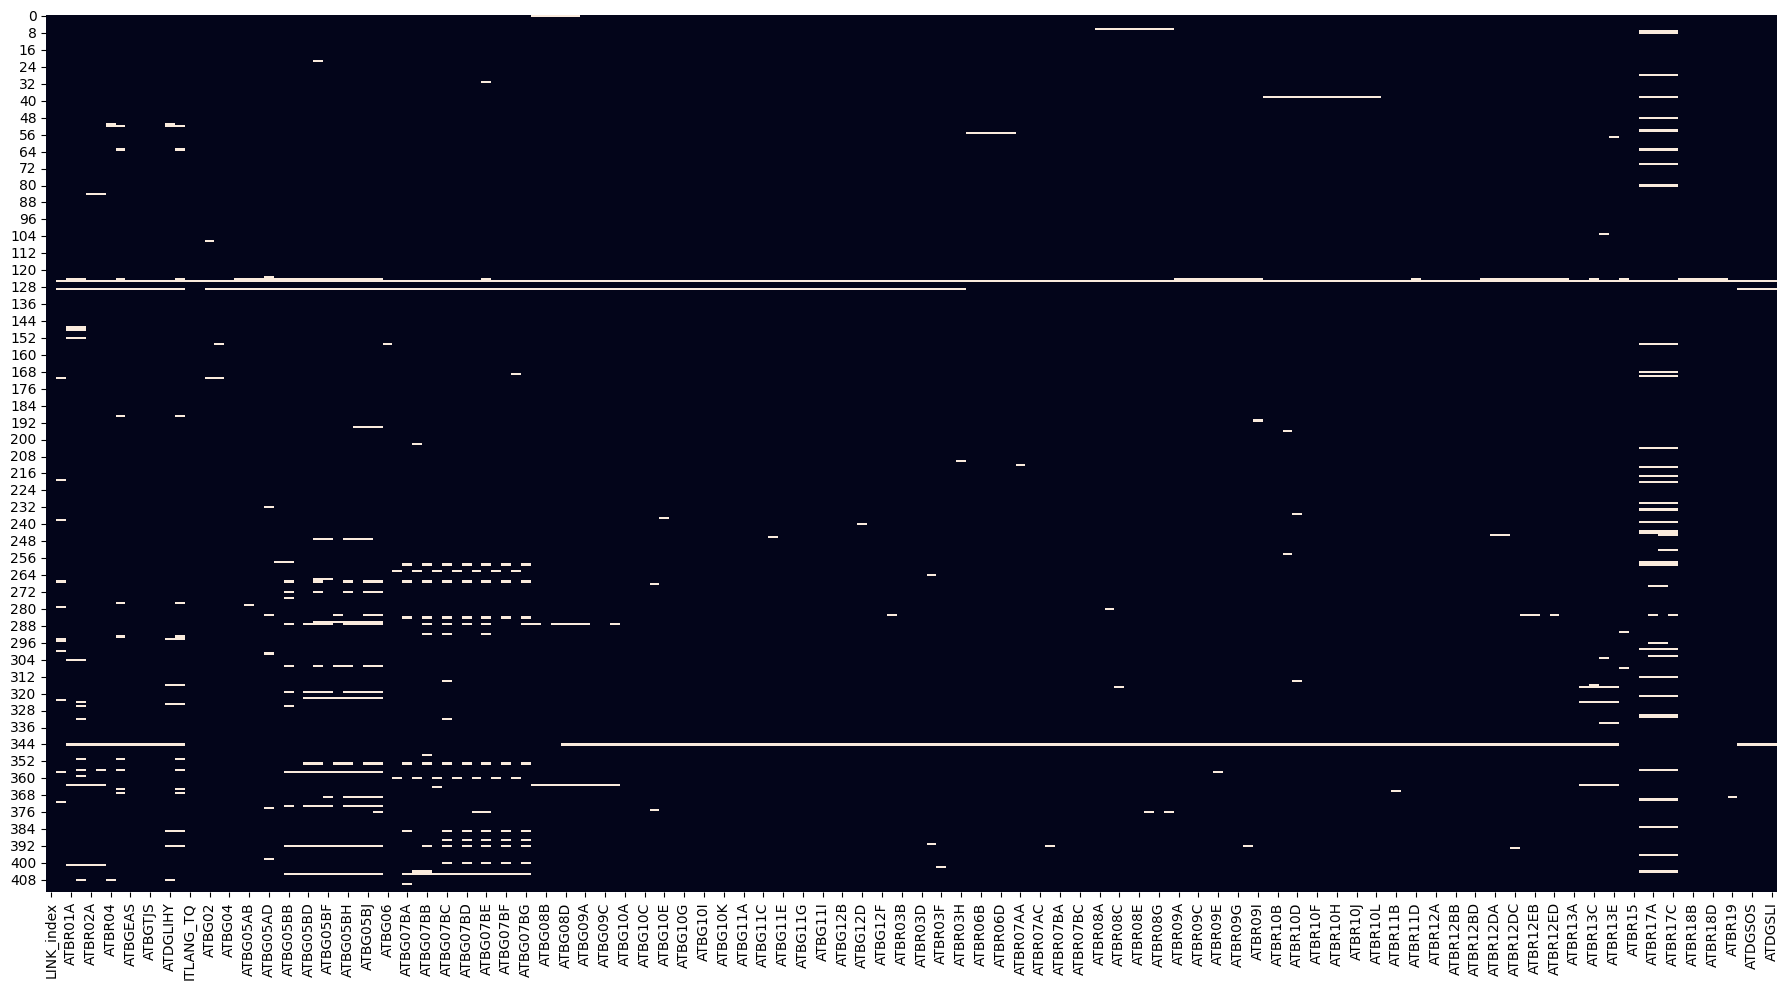

In [ ]:
missing_values_heatmap(df) #, output_path='缺失值热图PATH.jpg')

In [69]:
compute_missing(df).head(10)



,var_name,missing
163,ATBR17B,9.420290
162,ATBR17A,9.178744
164,ATBR17C,9.178744
161,ATBR16,8.212560
33,ATBG05BK,4.589372
32,ATBG05BJ,4.589372
13,ATDGRIHY,4.347826
27,ATBG05BE,4.347826
30,ATBG05BH,4.106280
3,ATBR01B,4.106280


#### 3.1.2. Data imputation. Step-by-step approach 数据填充。逐步方法

We use the functions available to run every step of the methodology independently. This allows the user to check the result of every step.

我们使用可用的函数来独立运行方法论的每一步。这允许用户检查每一步的结果。

In [70]:
# 注意这是可重复性的关键。每次运行分析时都要重启内核，以获得相同的结果
# Note this is essential for reproducibility. Restart kernel every time you run the analysis for getting same results
np.random.seed(42)

We start by calculating the imputation pairs for one-to-one model-based imputation.

我们首先计算一对一模型基础插补的插补配对。

In [71]:
# 这个函数的作用是生成一个“插补对”（imputation pairs）的列表，
# 用于确定哪些变量之间具有较强的相关性，可以用来填补缺失值。
ip = imputation_pairs(df, num_vars, cat_vars)

# 这个函数的作用是根据第一步生成的“填补对”来填补数据框 df 中的缺失值
df_imp_01 = impute_missing_values_with_highly_related_pairs(df, ip, num_vars, cat_vars)

Imputing with empirical discrete distribution LCID_TQ -> ATBR01A
Imputing with empirical discrete distribution LCID_TQ -> ATBR01B
Imputing with empirical discrete distribution ATBGEAS -> ATBG10E
Imputing with empirical discrete distribution ATBGSOS -> ATBG11D
Imputing with empirical discrete distribution ATBGTJS -> ATBG12D
Imputing with empirical discrete distribution ATBGSLI -> ATBR03A
Imputing with empirical discrete distribution ATBGSLI -> ATBR03F
Imputing with empirical discrete distribution ATBGSLI -> ATBR03H
Imputing with empirical discrete distribution ATBGEAS -> ATBG10D
Imputing with empirical discrete distribution ATBGSLI -> ATBR03E
Imputing with empirical discrete distribution ATBR03H -> ATBR02B
Imputing with empirical discrete distribution ATBG03 -> ATBG01
Imputing with linear regression ATBR04 -> ATDGLIHY
Imputing with linear regression ATBR05 -> ATDGRIHY


In [72]:
ip

,var1,var2,missing_var1,missing_var2
0,ATBR01A,LCID_TQ,2.415459,0.241546
1,ATBR01B,LCID_TQ,4.106280,0.241546
2,ATBG10E,ATBGEAS,0.966184,0.724638
3,ATBG11D,ATBGSOS,0.966184,0.724638
4,ATBG12D,ATBGTJS,0.966184,0.724638
5,ATBR03A,ATBGSLI,0.966184,0.724638
6,ATBR03F,ATBGSLI,0.966184,0.724638
7,ATBR03H,ATBGSLI,0.966184,0.724638
8,ATBG10D,ATBGEAS,1.207729,0.724638
9,ATBR03E,ATBGSLI,1.207729,0.724638


In [73]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp_01.shape, '>>', df_imp_01.isnull().sum().sum())

(414, 175) >> 973
(414, 175) >> 914


In [74]:
compute_missing(df)


,var_name,missing
163,ATBR17B,9.420290
162,ATBR17A,9.178744
164,ATBR17C,9.178744
161,ATBR16,8.212560
33,ATBG05BK,4.589372
...,...,...
166,ATBR18B,0.483092
14,ITLANG_TQ,0.241546
15,LCID_TQ,0.241546
160,ATBR15,0.241546


Let's visualize the imputation pair scatter plots.

让我们来可视化填充配对的散点图

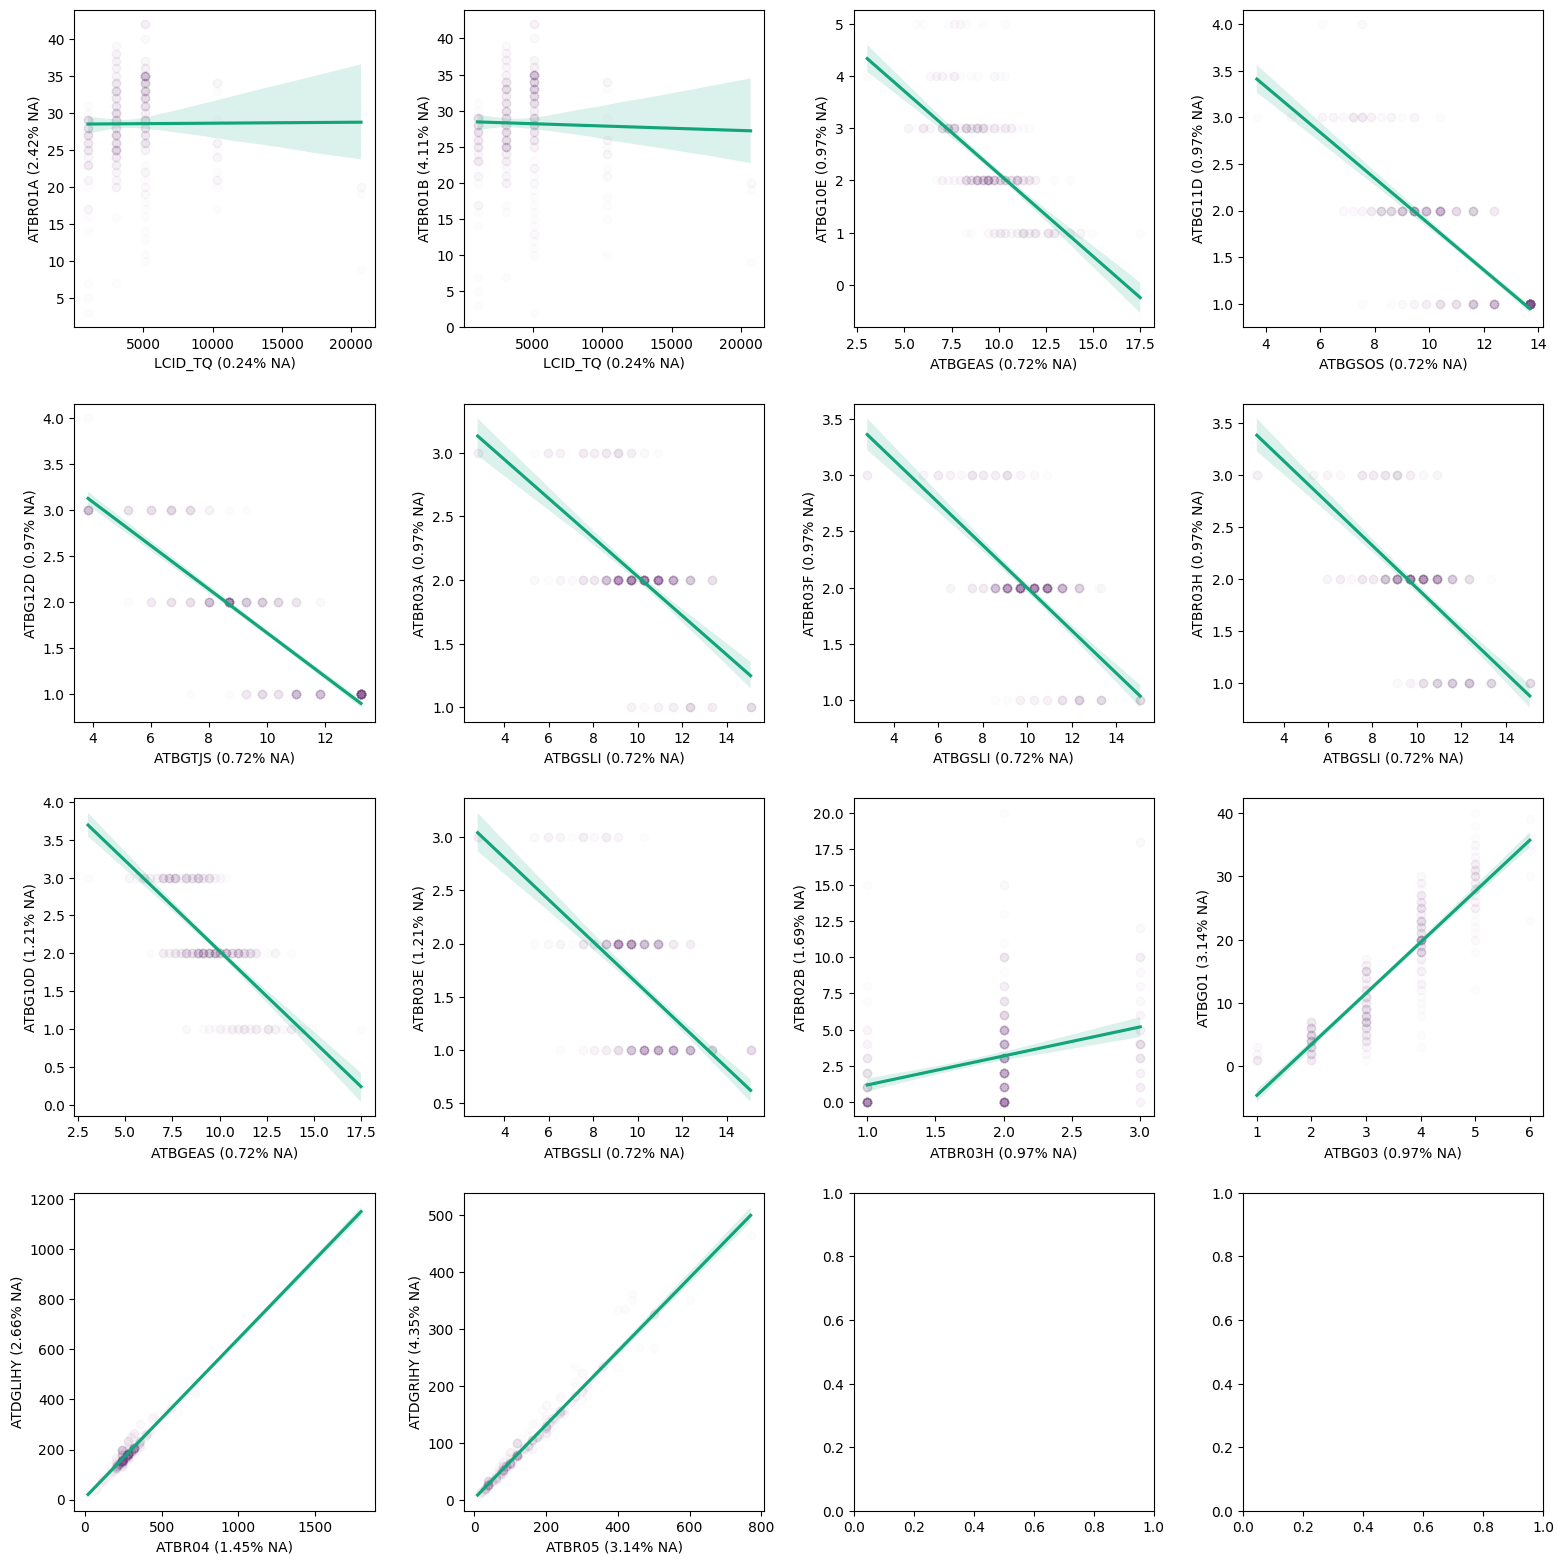

In [75]:
plot_imputation_pairs_scatter(df, ip, scatter_kws=dict(color='#7F3C8D', alpha=0.01), line_kws=dict(color='#11A579'))

Next, we calculate variable clusters for hot deck imputation.

接下来，我们计算用于热卡填充（Hot Deck Imputation）的变量的聚类。

In [76]:
mi_scores = mutual_information_pair_scores(df_imp_01, num_vars, cat_vars)
nodes, edges, comp = variable_graph_partitioning(mi_scores, thres=0.05)

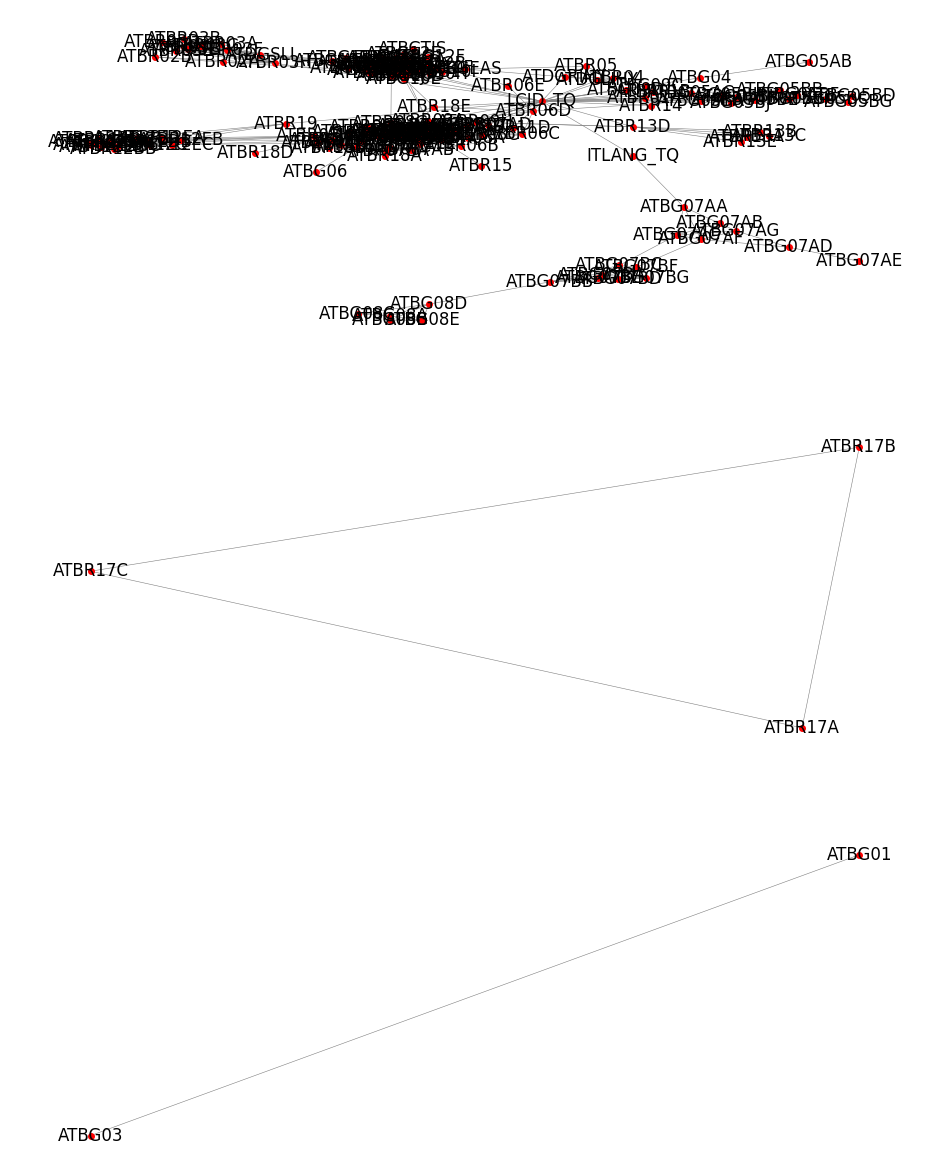

In [77]:
plot_variable_graph_partitioning_components(edges, comp[:3]) #, output_path='PATH.jpg')

In [78]:
df_imp_02 = hot_deck_imputation(df_imp_01, num_vars+cat_vars, k=8, partitions=list(np.array(comp)[np.array(list(map(len, comp))) >= 4]))

Partition: [np.str_('ATBG04'), 'ATBG05AB', 'ATBG05AC', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07AB', 'ATBG07AC', 'ATBG07AD', 'ATBG07AE', 'ATBG07AF', 'ATBG07AG', 'ATBG07BA', 'ATBG07BB', 'ATBG07BC', 'ATBG07BD', 'ATBG07BE', 'ATBG07BF', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09C', 'ATBG09D', 'ATBG10A', 'ATBG10B', 'ATBG10C', 'ATBG10D', 'ATBG10E', 'ATBG10F', 'ATBG10G', 'ATBG10H', 'ATBG10I', 'ATBG10J', 'ATBG10K', 'ATBG10L', 'ATBG11A', 'ATBG11B', 'ATBG11C', 'ATBG11D', 'ATBG11E', 'ATBG11F', 'ATBG11G', 'ATBG11H', 'ATBG11I', 'ATBG12A', 'ATBG12B', 'ATBG12C', 'ATBG12D', 'ATBG12E', 'ATBG12F', 'ATBGEAS', 'ATBGSLI', 'ATBGSOS', 'ATBGTJS', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBR03A', 'ATBR03B', 'ATBR03C', 'ATBR03D', 'ATBR03E', 'ATBR03F', 'ATBR03G', 'ATBR03H', 'ATBR04', 'ATBR05', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB

In [79]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp_01.shape, '>>', df_imp_01.isnull().sum().sum())
print(df_imp_02.shape, '>>', df_imp_02.isnull().sum().sum())

(414, 175) >> 973
(414, 175) >> 914
(414, 175) >> 591


Before imputing the remaining missing values, we remove those observations with more than 1/3 of the data missing, to ensure there is enough information to consider two observations as nearest neighbors.

在填充剩余的缺失值之前，我们移除那些缺失数据超过1/3的观测值，以确保有足够的信息将两个观测值视为最近邻。

In [80]:
df_imp_03 = df_imp_02[df_imp_02.isnull().sum(1) < df_imp_02.shape[1] *0.33]

In [81]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp_01.shape, '>>', df_imp_01.isnull().sum().sum())
print(df_imp_02.shape, '>>', df_imp_02.isnull().sum().sum())
print(df_imp_03.shape, '>>', df_imp_03.isnull().sum().sum())

(414, 175) >> 973
(414, 175) >> 914
(414, 175) >> 591
(411, 175) >> 204


In [82]:
df_imp_04 = hot_deck_imputation(df_imp_03, num_vars + cat_vars, k=8)

Partition: ['ATBG01', 'ATBG02', 'ATBG03', 'ATBG04', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07AB', 'ATBG07AC', 'ATBG07AD', 'ATBG07AE', 'ATBG07AF', 'ATBG07AG', 'ATBG07BA', 'ATBG07BB', 'ATBG07BC', 'ATBG07BD', 'ATBG07BE', 'ATBG07BF', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBG10A', 'ATBG10B', 'ATBG10C', 'ATBG10D', 'ATBG10E', 'ATBG10F', 'ATBG10G', 'ATBG10H', 'ATBG10I', 'ATBG10J', 'ATBG10K', 'ATBG10L', 'ATBG11A', 'ATBG11B', 'ATBG11C', 'ATBG11D', 'ATBG11E', 'ATBG11F', 'ATBG11G', 'ATBG11H', 'ATBG11I', 'ATBG12A', 'ATBG12B', 'ATBG12C', 'ATBG12D', 'ATBG12E', 'ATBG12F', 'ATBGEAS', 'ATBGSLI', 'ATBGSOS', 'ATBGTJS', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBR03A', 'ATBR03B', 'ATBR03C', 'ATBR03D', 'ATBR03E', 'ATBR03F', 'ATBR03G', 'ATBR03H', 'ATBR04', 'ATBR05'

In [83]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp_01.shape, '>>', df_imp_01.isnull().sum().sum())
print(df_imp_02.shape, '>>', df_imp_02.isnull().sum().sum())
print(df_imp_03.shape, '>>', df_imp_03.isnull().sum().sum())
print(df_imp_04.shape, '>>', df_imp_04.isnull().sum().sum())

(414, 175) >> 973
(414, 175) >> 914
(414, 175) >> 591
(411, 175) >> 204
(411, 175) >> 0


Let's now check that all values have been imputed and that the resulting variable distributions after imputation look similar to the original ones.

现在让我们检查所有值是否都已填充，并且填充后的变量分布与原始分布是否相似.

In [84]:
compute_missing(df_imp_04)

,var_name,missing
0,LINK_index,0.0
1,ATBG01,0.0
2,ATBR01A,0.0
3,ATBR01B,0.0
4,ATBR02A,0.0
...,...,...
170,ATBR19,0.0
171,ATDGEAS,0.0
172,ATDGSOS,0.0
173,ATDGTJS,0.0


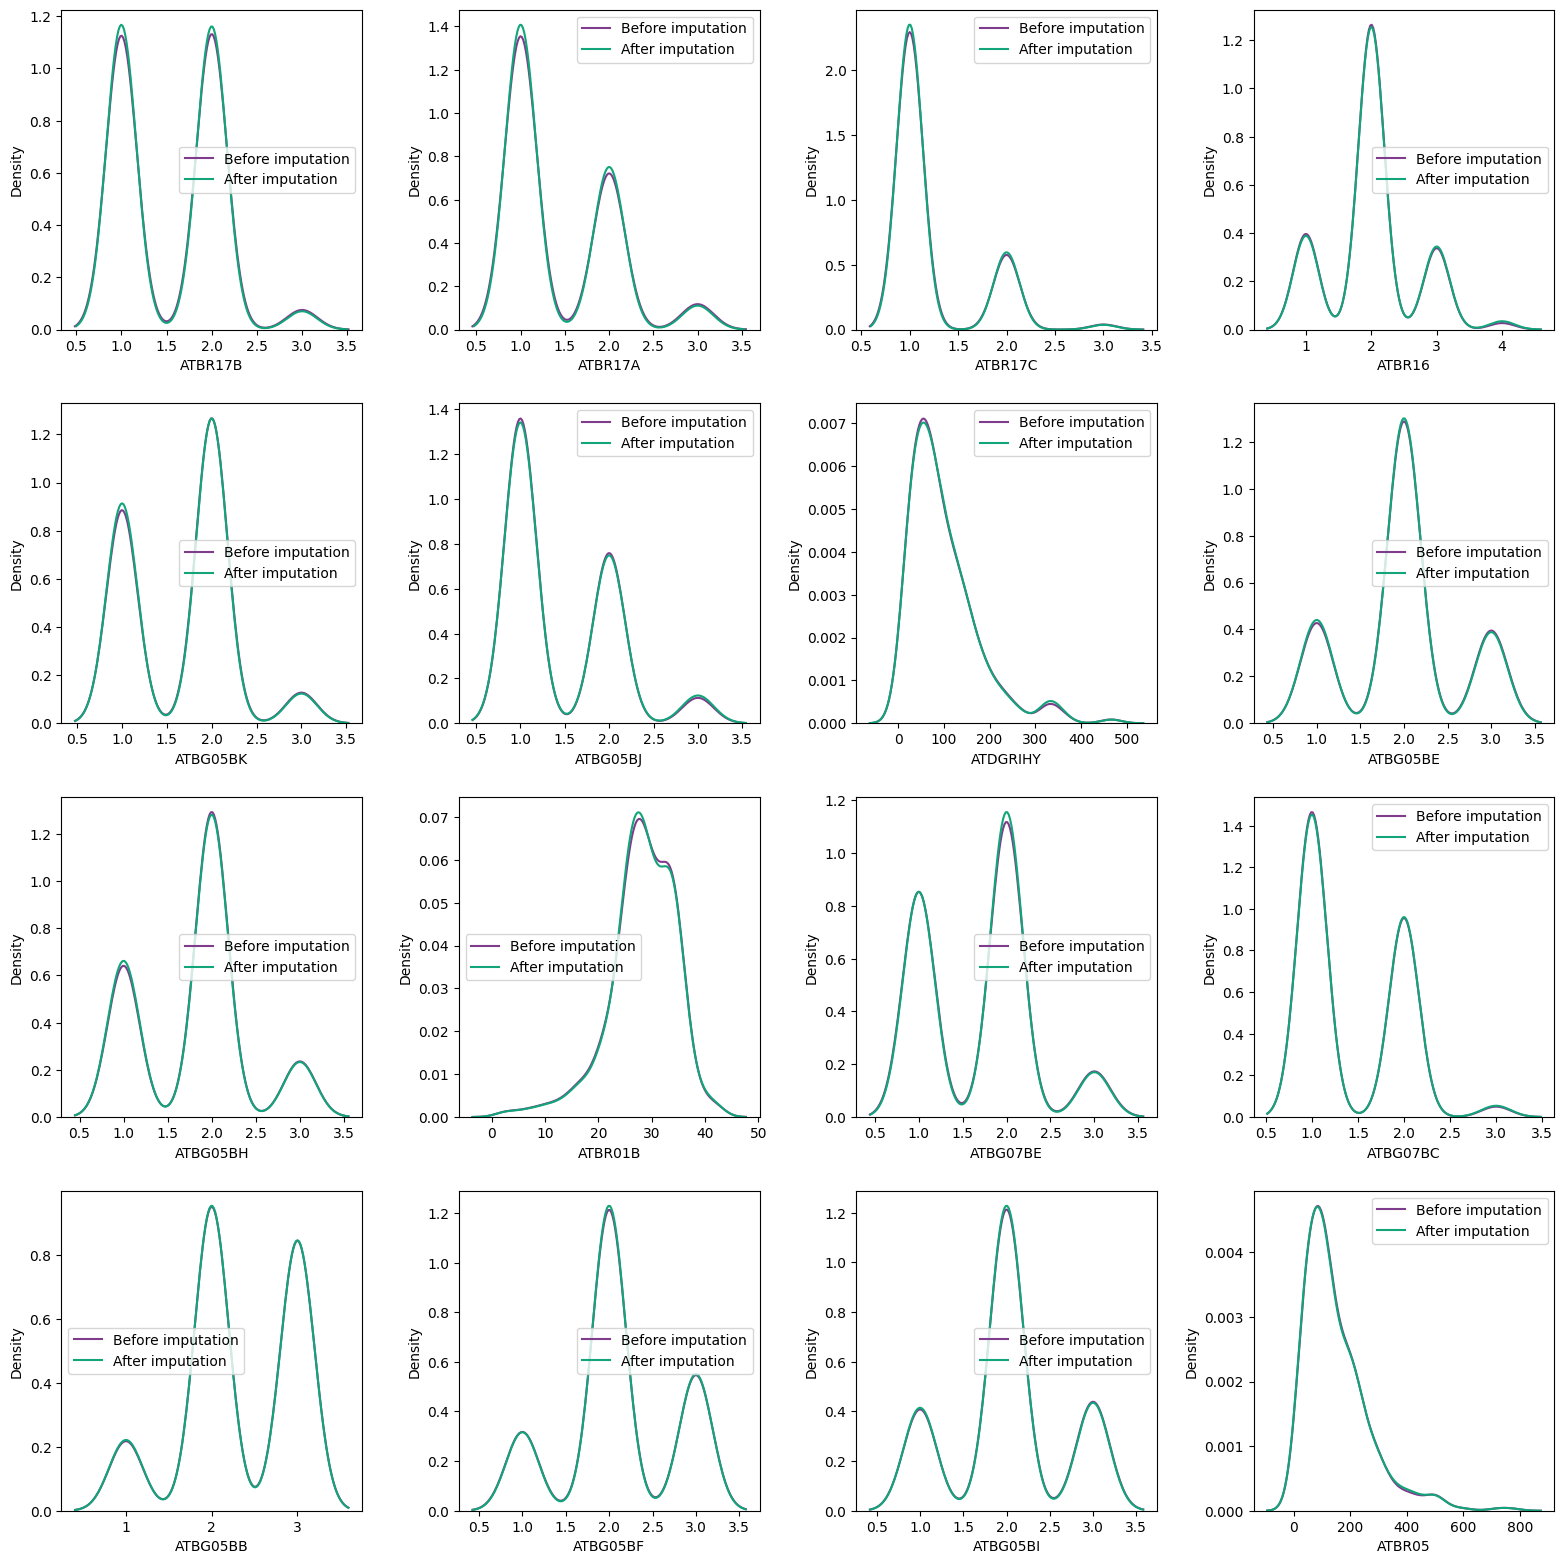

In [ ]:
plot_imputation_distribution_assessment(df.loc[df_imp_04.index], df_imp_04, list(compute_missing(df).head(16)['var_name']))
# 插补分布对比图

Save the data frame with imputed values.

保存填充后的数据框。

In [ ]:
#df_imp_04.to_csv('data2/ATG_modified_manual_imputartion_output.csv', index=False)

### 3.2. Outlier detection 异常值检测

In [87]:
clean, outliers = remove_outliers(df_imp_04, num_vars+cat_vars)

In [88]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp_01.shape, '>>', df_imp_01.isnull().sum().sum())
print(df_imp_02.shape, '>>', df_imp_02.isnull().sum().sum())
print(df_imp_03.shape, '>>', df_imp_03.isnull().sum().sum())
print(df_imp_04.shape, '>>', df_imp_04.isnull().sum().sum())
print(clean.shape, '>>', clean.isnull().sum().sum())

(414, 175) >> 973
(414, 175) >> 914
(414, 175) >> 591
(411, 175) >> 204
(411, 175) >> 0
(341, 175) >> 0


In [ ]:
#clean.to_csv('data2/ATG_modified_processed_manual_output.csv', index=False)
#outliers.to_csv('data2/ATG_modified_outliers_manual_output.csv', index=False)